In [34]:
import scipy.io
import numpy as np
import itertools
from scipy.fftpack import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

In [35]:
## import dataset
mat = scipy.io.loadmat('SSVEPDataset.mat')
data = mat['subject'][0]
number_of_subjects = len(data)
number_of_conditions = len(data[0])
number_of_samplings = len(data[0][0])
print "Data includes", number_of_subjects, "subjects :"
print "(", number_of_conditions, "conditions per subject )"
print "(", number_of_samplings, "samplings per condition )"
#print data

Data includes 12 subjects :
( 5 conditions per subject )
( 15000 samplings per condition )


In [46]:
## select one condition data and filter out first 10-second data
#set params
condition_id = 5 # ( 1 to 5 )
number_of_samplings_per_sec = 250
filtered_secs = 10
all_secs = number_of_samplings/number_of_samplings_per_sec
used_secs = all_secs - filtered_secs
number_of_filter_out_samplings = number_of_samplings_per_sec * filtered_secs

#get data
data_selected = np.zeros((number_of_subjects, number_of_samplings-number_of_filter_out_samplings))
for i, d in enumerate(data):
    join_list = list(itertools.chain.from_iterable(d[condition_id-1]))
    
    #bandpass filter
    nyq = 0.5 * number_of_samplings_per_sec
    low = 7 / nyq
    high = 8 / nyq
    order = 2
    b, a = butter(order, [low, high], btype='band')
    f = lfilter(b, a, join_list)
    
    #filter out first-ten second
    data_selected[i] = f[number_of_filter_out_samplings:]

print "Select data from condition #", condition_id
print "Size of data is", len(data_selected), "subjects with", len(data_selected[0]), "samplings per subject."

Select data from condition # 5
Size of data is 12 subjects with 12500 samplings per subject.


Each subjects contains 46 windows.
==== FFT with subjects # 0 ====


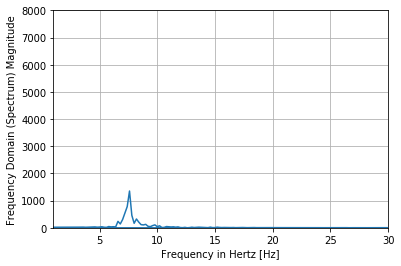

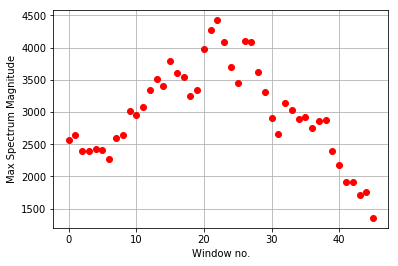

==== FFT with subjects # 1 ====


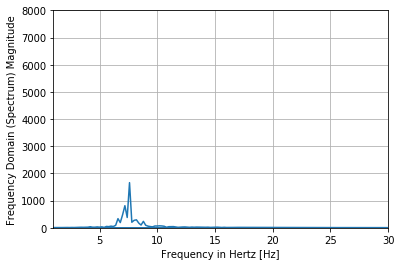

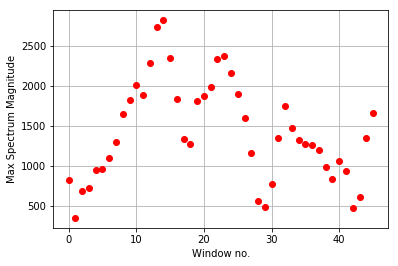

==== FFT with subjects # 2 ====


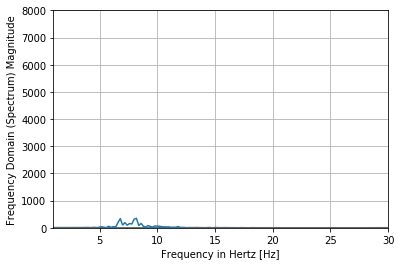

In [ ]:
## perform Fast Fourier Transform (FFT)
#set params
window_size = 5 #seconds
number_of_slide_windows = used_secs-window_size+1
fft_out_max_list = np.zeros((number_of_subjects, number_of_slide_windows))
print "Each subjects contains", number_of_slide_windows, "windows."

#FFT
for i, d in enumerate(data_selected):
    print "==== FFT with subjects #", i, "===="
    for index in range(0, number_of_slide_windows):
        #print "From second #", index, "to", index+window_size-1,"( sampling no.", index*number_of_samplings_per_sec, "to", (index + window_size) * number_of_samplings_per_sec - 1, ")"
        
        #FFT with one window
        fft_out = fft(d[index*number_of_samplings_per_sec : (index + window_size) * number_of_samplings_per_sec])
        
        #Get value from maximum freq
        fft_out_max_list[i][index] = np.abs(fft_out)[np.where(freqs==7.6)]

        if index == number_of_slide_windows - 1:
            #plot FFT of some specific window
            freqs = fftfreq(len(fft_out)) * number_of_samplings_per_sec
            fig, ax = plt.subplots()
            ax.plot(freqs, np.abs(fft_out))
            ax.set_xlabel('Frequency in Hertz [Hz]')
            ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
            ax.set_xlim(1, 30)
            ax.set_ylim(1, 8000)
            plt.grid()
            plt.show() 
            
    plt.plot(fft_out_max_list[i], 'ro')
    plt.xlabel('Window no.')
    plt.ylabel('Max Spectrum Magnitude')
    plt.grid()
    plt.show()
                